In [3]:
import pandas as pd 
import numpy as np 



df = pd.read_csv("Medical_insurance.csv")



In [4]:
#view the data set  
print(df.head(10)) 
# could try and run a correlation matrix to see where the strongest relationships apply 
#Lets have our target variable be charge since the data set is about medical insurance and lets do it using linear regression 

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


In [5]:
#run a correlation matrix we have to get rid of categorical variables - i.e. one hot encode them for each column 
#start with sex female, male - smoker : yes, no - region: northwest , southwest,northeast, southeast 
df_encoded = df 
df_encoded["sex"] = df_encoded["sex"].replace({"female":1 , "male":0})
df_encoded['sex'] # female is 1 and male is 0 
# now repeat with other columns 
df_encoded['smoker'] = df_encoded["smoker"].replace({'yes':1,'no':0})
df_encoded['region']= df_encoded['region'].replace({"northwest":1,'northeast':2, 'southwest':3, 'southeast':4})
print(df_encoded.head(5))

   age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       1       3  16884.92400
1   18    0  33.770         1       0       4   1725.55230
2   28    0  33.000         3       0       4   4449.46200
3   33    0  22.705         0       0       1  21984.47061
4   32    0  28.880         0       0       1   3866.85520


In [7]:
#now to run correlation plot 
df_encoded.corr()
#our target variable has two strong relationships - smoker and age and a weak one with bmi - so lets try all three for the analysis 


,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
sex,0.026046,1.000000,-0.042924,-0.016020,-0.082326,-0.022213,-0.062837
bmi,0.113048,-0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
children,0.037574,-0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023286,-0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007167,-0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298624,-0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


In [57]:
#time to create the model 
from sklearn.model_selection import train_test_split
model_df = df_encoded
model_df = df_encoded[['smoker','bmi','age','charges']]
print(model_df.head(5))
x_train,x_test,y_train,y_test = train_test_split(model_df[['smoker','age','bmi']],model_df['charges'],test_size=.2, random_state=42)

#now that our train and test are initialized we can create the model 

   smoker     bmi  age      charges
0       1  27.900   19  16884.92400
1       0  33.770   18   1725.55230
2       0  33.000   28   4449.46200
3       0  22.705   33  21984.47061
4       0  28.880   32   3866.85520


In [58]:
from sklearn.linear_model import LinearRegression as ln
reg = ln()
reg.fit(x_train,y_train)

print( "Coefficient ,", reg.coef_)
print("Intercept :", reg.intercept_)

Coefficient , [23864.28478544   256.36539487   307.63383671]
Intercept : -11150.099852733638


In [78]:
# now for the prediction and accuracy 
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score
y_pred = reg.predict(x_test)
#calculate root mean square error 

MAE = mean_absolute_error(y_test,y_pred)
print('mean absolute error :', MAE)
MAPE = mean_absolute_percentage_error(y_test,y_pred)
print('Mean absolute percentage error', MAPE*100)
rsquare = r2_score(y_test,y_pred)
print( "R squared score :" ,rsquare)
#R2 = 74% --> model can explain about 74 % of the data confidentally 
#MAE = 4321.06 
#MAPE = 51% --> relatively good accuracy 
accuracy = reg.score(x_test,y_test)
print("Accuracy of model :", accuracy)
#accuracy = 74% 


mean absolute error : 4321.068280203284
Mean absolute percentage error 51.50484888370169
R squared score : 0.7362082203818494
Accuracy of model : 0.7362082203818494
Mean Squared Error : 40487014.830973744


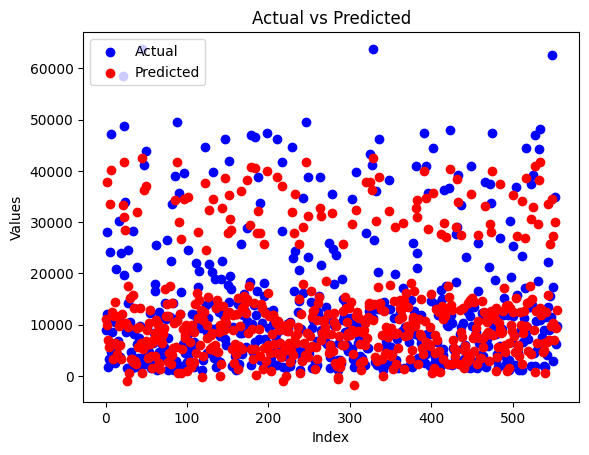

In [74]:
import matplotlib.pyplot as mp 
index = range(len(y_test))
mp.scatter(index,y_test, color ="blue",label = 'Actual')
mp.scatter(index,y_pred,color ='red',label = "Predicted")

mp.xlabel('Index')
mp.ylabel('Values')
mp.title('Actual vs Predicted')
mp.legend(loc = 'upper left')
mp.show()
# graph to show the points of predicted vs actual 
#graph shows that alot of our values are mapping on to the actual values well and can see a trend in that. 

In [ ]:
# find a way to use docker to deploy model and add to website for use to predict medical insurance charges. 